In [7]:
import pandas as pd

# 1. Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
url = 'https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523'
data = pd.read_csv(url)


In [10]:

# 2. Прочитайте отриману таблицю, використовуючи метод head
print("Перші 5 рядків таблиці:")
print(data.head())



Перші 5 рядків таблиці:
   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                 

In [11]:

# 3. Визначте розмір таблиці за допомогою методу shape
print(f"Розмір таблиці: {data.shape}")


Розмір таблиці: (8704, 25)


In [12]:

# 4. Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("\nТипи стовпців:")
print(data.dtypes)




Типи стовпців:
N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary          

In [5]:
# 5. Порахуйте, яка частка пропусків міститься в кожній колонці
missing_data = data.isnull().sum() / len(data) * 100
print("\nЧастка пропусків у кожному стовпці (%):")
print(missing_data)




Частка пропусків у кожному стовпці (%):
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.

In [34]:
# 6. Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
columns_with_na = missing_data[missing_data > 0].index.tolist()
columns_to_keep = ['Мова програмування']
columns_to_drop = [col for col in columns_with_na if col not in columns_to_keep]
data_cleaned = data.drop(columns=columns_to_drop)


['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']


In [35]:
# 7. Знову порахуйте частку пропусків і переконайтеся, що залишився тільки стовпець "Мова.програмування"
missing_data_cleaned = data_cleaned.isnull().sum() / len(data_cleaned) * 100
print("\nЧастка пропусків у очищеній таблиці:")
print(missing_data_cleaned)


Частка пропусків у очищеній таблиці:
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [36]:
# 8. Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
data_cleaned = data_cleaned.dropna()



In [39]:
# 9. Визначте новий розмір таблиці за допомогою методу shape
print(f"\nНовий розмір таблиці після очищення: {data_cleaned.shape}")




Новий розмір таблиці після очищення: (4854, 20)


In [41]:
# 10. Створіть нову таблицю python_data для спеціалістів, які вказали Python
python_data = data_cleaned[data_cleaned['Мова програмування'].str.contains("Python", na=False)]



In [42]:
# 11. Визначте розмір таблиці python_data
print(f"\nРозмір таблиці python_data: {python_data.shape}")




Розмір таблиці python_data: (207, 20)


In [44]:
# 12. Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
grouped = python_data.groupby('Посада')



In [46]:
# 13. Створіть новий DataFrame для мінімальної та максимальної зарплати
salary_agg = grouped['Зарплата на місяць'].agg(['min', 'max'])
print("\nМінімальна та максимальна зарплата по посадах:")
print(salary_agg)




Мінімальна та максимальна зарплата по посадах:
                           min   max
Посада                              
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [47]:
# 14. Створіть функцію fill_avg_salary
def fill_avg_salary(row):
    return (row['min'] + row['max']) / 2

# Застосуйте функцію та створіть новий стовпчик "avg"
salary_agg['avg'] = salary_agg.apply(fill_avg_salary, axis=1)


In [48]:

# 15. Створіть описову статистику за допомогою методу describe для нового стовпчика
print("\nОписова статистика для стовпчика 'avg':")
print(salary_agg['avg'].describe())




Описова статистика для стовпчика 'avg':
count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [49]:
# 16. Збережіть отриману таблицю в CSV файл
salary_agg.to_csv('salary_agg_python_data.csv', index=True)

In [17]:
# Підготовка даних для таблиць
import matplotlib.pyplot as plt
url = 'https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523'

df = pd.read_csv(url)
average_salary = df.groupby('Посада')['Зарплата на місяць'].mean().reset_index()
town_salary = df.groupby('Місто')['Зарплата на місяць'].mean().reset_index()
town_counts = df['Місто'].value_counts()
town_counts = town_counts[town_counts > 200]


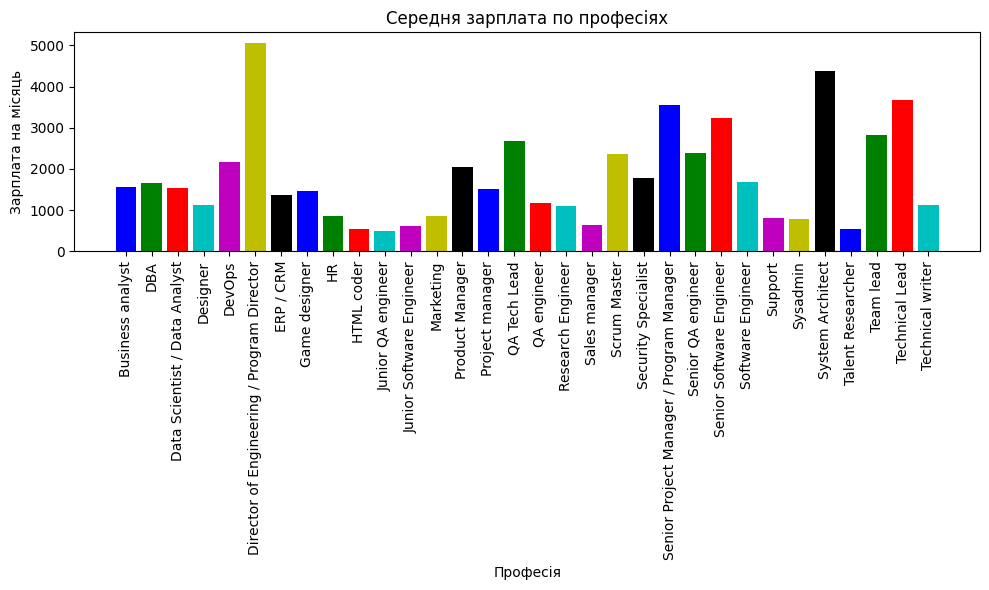

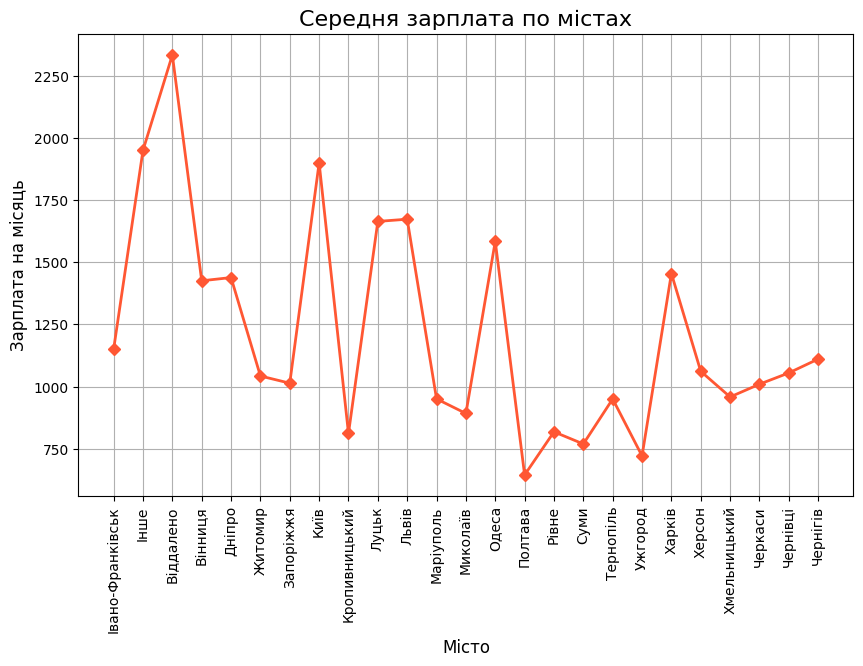

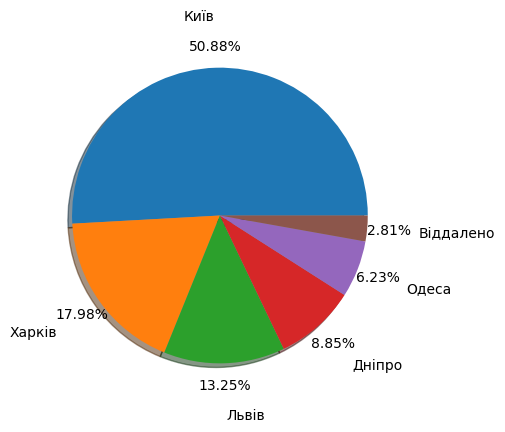

In [19]:
# Графік середньої зарплати по професіях
plt.figure(figsize=(10,6))
plt.bar(average_salary['Посада'], average_salary['Зарплата на місяць'], color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.xlabel('Професія')
plt.ylabel('Зарплата на місяць')
plt.title('Середня зарплата по професіях')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Графік середньої зарплати по містах
plt.figure(figsize=(10, 6))
plt.plot(
    town_salary['Місто'],
    town_salary.groupby('Місто')['Зарплата на місяць'].sum(),
    linestyle="-",  color="#FF5733", linewidth=2, marker="D",
)
plt.title('Середня зарплата по містах', fontsize=16)
plt.xlabel('Місто', fontsize=12)
plt.ylabel('Зарплата на місяць', fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
# Графік кількості наведених професій по основних містах (для міст, які зустрічаються в таблиці > 200 разів) 
labels = town_counts.index
data = town_counts
plt.pie(
    data,
    labels=labels,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)
plt.show()
